# Exercise 2

## Implementing a Bloom Filter

A Bloom filter is a space-efficient probabilistic data structure to test whether an element is a member of a set. The chance of false positives can occur, but false negatives do not.

### Objective

We aim to implement a Bloom filter using a `bitarray` and three hash functions: `sha256`, `blake2b`, and `sha3_256` to store English words and identify if a word might be in the dataset.

### Steps
1. **Initialize Bloom Filter:**
    Initialize the Bloom filter as a `bitarray` of zeros of some arbitrary `size`.
2. **Hash Functions:**
    Define the three given hash functions that return integer values within the range `[0, size)`.
3. **Adding Words:**
    For each word in the dataset, compute hash values using the three hash functions and set the corresponding positions in the `bitarray` to 1.
4. **Checking Words:**
    To check if a word is likely in the dataset, compute its hash values using the three hash functions. If any of the corresponding positions in the `bitarray` is 0, the word is definitely not in the dataset. If all are 1, the word might be in the dataset, with a certain probability of being a false positive.

In [2]:
import bitarray
from hashlib import sha3_256, sha256, blake2b

class BloomFilter:
    def __init__(self, size=int(1e7)):  # default size is arbitrary; it could be adjusted
        self.size = size
        self.data = bitarray.bitarray(size)
        self.data.setall(0)

    def add(self, s):
        self.data[self.my_hash(s)] = 1
        self.data[self.my_hash2(s)] = 1
        self.data[self.my_hash3(s)] = 1

    def check(self, s):
        return self.data[self.my_hash(s)] and self.data[self.my_hash2(s)] and self.data[self.my_hash3(s)]

    def my_hash(self, s):
        return int(sha256(s.lower().encode()).hexdigest(), 16) % self.size

    def my_hash2(self, s):
        return int(blake2b(s.lower().encode()).hexdigest(), 16) % self.size

    def my_hash3(self, s):
        return int(sha3_256(s.lower().encode()).hexdigest(), 16) % self.size

In [3]:
# Initialize bloom filter
bloom = BloomFilter()

In [4]:
# Add words to bloom filter
with open('words.txt') as f:
    for line in f:
        word = line.strip()
        bloom.add(word)

In [5]:
# Test with some words
test_word = "floeer"
if bloom.check(test_word):
    print(f"{test_word} might be in the dataset")
else:
    print(f"{test_word} is definitely not in the dataset")

floeer is definitely not in the dataset


## Implementing Spelling Correction with Bloom Filter

In [15]:
import bitarray
from hashlib import sha3_256, sha256, blake2b

# Define the size of your bloom filter
size = 10000000
data1 = bitarray.bitarray(size)
data2 = bitarray.bitarray(size)
data3 = bitarray.bitarray(size)

data1.setall(0)
data2.setall(0)
data3.setall(0)

# Define the hash functions
def my_hash(s):
    return int(sha256(s.lower().encode()).hexdigest(), 16) % size

def my_hash2(s):
    return int(blake2b(s.lower().encode()).hexdigest(), 16) % size

def my_hash3(s):
    return int(sha3_256(s.lower().encode()).hexdigest(), 16) % size

with open('words.txt') as f:
    for line in f:
        word = line.strip()
        data1[my_hash(word)] = 1
        data2[my_hash(word)] = 1
        data2[my_hash2(word)] = 1
        data3[my_hash(word)] = 1
        data3[my_hash2(word)] = 1
        data3[my_hash3(word)] = 1


# Define the spelling correction functions
import string
def spelling_correction1(word):  # Using the first two hash functions
    possible_suggestions = []
    alphabet = list(string.ascii_lowercase)
    for i in range(len(word)):
        for letter in alphabet:
            new_word = word[:i] + letter + word[i+1:]
            if data1[my_hash(new_word)]:
                possible_suggestions.append(new_word)
    return possible_suggestions

def spelling_correction2(word):  # Using the first two hash functions
    possible_suggestions = []
    alphabet = list(string.ascii_lowercase)
    for i in range(len(word)):
        for letter in alphabet:
            new_word = word[:i] + letter + word[i+1:]
            if data2[my_hash(new_word)] and data2[my_hash2(new_word)]:
                possible_suggestions.append(new_word)
    return possible_suggestions

def spelling_correction3(word):  # Using all three hash functions
    possible_suggestions = []
    alphabet = list(string.ascii_lowercase)
    for i in range(len(word)):
        for letter in alphabet:
            new_word = word[:i] + letter + word[i+1:]
            if data3[my_hash(new_word)] and data3[my_hash2(new_word)] and data3[my_hash3(new_word)]:
                possible_suggestions.append(new_word)
    return possible_suggestions

### Spelling corrections of “floeer” when using 1e7 bits: 

In [16]:
print(spelling_correction1("floeer"))

['bloeer', 'qloeer', 'fyoeer', 'flofer', 'floter', 'flower', 'floeqr', 'floees']


In [17]:
print(spelling_correction2("floeer"))

['fyoeer', 'floter', 'flower']


In [18]:
print(spelling_correction3("floeer"))

['floter', 'flower']


# Evaluate the Effectiveness for Different Sizes and Hash Functions

In this analysis, we use a Bloom filter to suggest spelling corrections. We analyze the performance of our Bloom filter implementation by varying the filter size and the number of hash functions used. Our primary metrics for performance are the number of misidentified words and the number of "good suggestions".

In [19]:
import json
import pandas as pd
import numpy as np

/Users/jiangbei/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [20]:
# Load typos
with open('typos.json', 'r') as file:
    typos = json.load(file)

In [21]:
# Initialize arrays for storing results
test_size = np.logspace(4, 10, num=20, dtype=int, base=10)
num_misidentified1 = []
num_good_suggestions1 = []
num_misidentified2 = []
num_good_suggestions2 = []
num_misidentified3 = []
num_good_suggestions3 = []

In [24]:
# Test loop for different sizes
count = 0
for size in test_size: 
    count += 1
    print(count)
    # Initialize bloom filters for each hash function combination
    data1 = bitarray.bitarray(size)  # Using the first hash function
    data2 = bitarray.bitarray(size)  # Using the first two hash functions
    data3 = bitarray.bitarray(size)  # Using all three hash functions
    data1.setall(0)
    data2.setall(0)
    data3.setall(0)
    
     # Define hash functions 
    def my_hash(s):
        return int(sha256(s.lower().encode()).hexdigest(), 16) % size

    def my_hash2(s):
        return int(blake2b(s.lower().encode()).hexdigest(), 16) % size

    def my_hash3(s):
        return int(sha3_256(s.lower().encode()).hexdigest(), 16) % size

    # Populate bloom filters using words from file
    with open('words.txt') as f:
        for line in f:
            word = line.strip()
            data1[my_hash(word)] = 1
            data2[my_hash(word)] = 1
            data2[my_hash2(word)] = 1
            data3[my_hash(word)] = 1
            data3[my_hash2(word)] = 1
            data3[my_hash3(word)] = 1
    def spelling_correction1(word):  # Using the first two hash functions
        possible_suggestions = []
        alphabet = list(string.ascii_lowercase)
        for i in range(len(word)):
            for letter in alphabet:
                new_word = word[:i] + letter + word[i+1:]
                if data1[my_hash(new_word)]:
                    possible_suggestions.append(new_word)
        return possible_suggestions

    def spelling_correction2(word):  # Using the first two hash functions
        possible_suggestions = []
        alphabet = list(string.ascii_lowercase)
        for i in range(len(word)):
            for letter in alphabet:
                new_word = word[:i] + letter + word[i+1:]
                if data2[my_hash(new_word)] and data2[my_hash2(new_word)]:
                    possible_suggestions.append(new_word)
        return possible_suggestions

    def spelling_correction3(word):  # Using all three hash functions
        possible_suggestions = []
        alphabet = list(string.ascii_lowercase)
        for i in range(len(word)):
            for letter in alphabet:
                new_word = word[:i] + letter + word[i+1:]
                if data3[my_hash(new_word)] and data3[my_hash2(new_word)] and data3[my_hash3(new_word)]:
                    possible_suggestions.append(new_word)
        return possible_suggestions
    
    # Testing bloom filters with typos dataset
    mis_num1, good_num1, mis_num2, good_num2, mis_num3, good_num3 = 0, 0, 0, 0, 0, 0
    for i in range(len(typos)):
        # For first hash function
        if data1[my_hash(typos[i][0])] == 1:
            mis_num1 += 1
        else:
            correction = spelling_correction1(typos[i][0])
            if typos[i][1] in correction and len(correction) <= 3:
                good_num1 += 1

        # For first two hash functions
        if data2[my_hash(typos[i][0])] == data2[my_hash2(typos[i][0])] == 1:
            mis_num2 += 1
        else:
            correction = spelling_correction2(typos[i][0])
            if typos[i][1] in correction and len(correction) <= 3:
                good_num2 += 1

        # For all three hash functions
        if data3[my_hash(typos[i][0])] == data3[my_hash2(typos[i][0])] == data3[my_hash3(typos[i][0])] == 1:
            mis_num3 += 1
        else:
            correction = spelling_correction3(typos[i][0])
            if typos[i][1] in correction and len(correction) <= 3:
                good_num3 += 1

    # Storing results for this size
    num_misidentified1.append(mis_num1 - len(typos) / 2)
    num_good_suggestions1.append(good_num1)
    num_misidentified2.append(mis_num2 - len(typos) / 2)
    num_good_suggestions2.append(good_num2)
    num_misidentified3.append(mis_num3 - len(typos) / 2)
    num_good_suggestions3.append(good_num3)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


In [41]:
# Define the categories
categories = [
    "misidentified, 1 hash",
    "misidentified, 2 hashes",
    "misidentified, 3 hashes",
    "good suggestion, 1 hash",
    "good suggestion, 2 hashes",
    "good suggestion, 3 hashes"
]

# Create the main DataFrame
plot_data = pd.DataFrame({
    "size": list(test_size) * 6,
    "percentages": ["{:.2%}".format(num / len(typos) * 2) for num in num_misidentified1 + num_misidentified2 + num_misidentified3 +
                   num_good_suggestions1 + num_good_suggestions2 + num_good_suggestions3],
    "Good suggestions or misclassified": ["misidentified, 1 hash"] * len(test_size) + ["misidentified, 2 hashes"] * len(test_size) +
                                        ["misidentified, 3 hashes"] * len(test_size) + ["good suggestion, 1 hash"] * len(test_size) +
                                        ["good suggestion, 2 hashes"] * len(test_size) + ["good suggestion, 3 hashes"] * len(test_size)
})

# Split the main DataFrame into 6 separate DataFrames
dfs = {}
for category in categories:
    dfs[category] = plot_data[plot_data['Good suggestions or misclassified'] == category]

# Print each DataFrame
for key, df in dfs.items():
    with pd.option_context('display.max_rows', None, 'display.max_columns', None):
        print(f"\nDataFrame for {key}:\n")
        print(df)



DataFrame for misidentified, 1 hash:

           size percentages Good suggestions or misclassified
0         10000     100.00%             misidentified, 1 hash
1         20691     100.00%             misidentified, 1 hash
2         42813     100.00%             misidentified, 1 hash
3         88586      99.47%             misidentified, 1 hash
4        183298      91.85%             misidentified, 1 hash
5        379269      70.99%             misidentified, 1 hash
6        784759      45.09%             misidentified, 1 hash
7       1623776      25.16%             misidentified, 1 hash
8       3359818      13.16%             misidentified, 1 hash
9       6951927       6.49%             misidentified, 1 hash
10     14384498       3.11%             misidentified, 1 hash
11     29763514       1.44%             misidentified, 1 hash
12     61584821       0.77%             misidentified, 1 hash
13    127427498       0.35%             misidentified, 1 hash
14    263665089       0.20%    

In [42]:
# Extract sizes and percentages for 'good suggestion, 1 hash'
sizes_1_hash = plot_data.loc[plot_data["Good suggestions or misclassified"] == "good suggestion, 1 hash", "size"].tolist()
percentages_1_hash = [float(p.strip('%')) for p in plot_data.loc[plot_data["Good suggestions or misclassified"] == "good suggestion, 1 hash", "percentages"].tolist()]

# Extract sizes and percentages for 'good suggestion, 2 hashes'
sizes_2_hash = plot_data.loc[plot_data["Good suggestions or misclassified"] == "good suggestion, 2 hashes", "size"].tolist()
percentages_2_hash = [float(p.strip('%')) for p in plot_data.loc[plot_data["Good suggestions or misclassified"] == "good suggestion, 2 hashes", "percentages"].tolist()]

# Extract sizes and percentages for 'good suggestion, 3 hashes'
sizes_3_hash = plot_data.loc[plot_data["Good suggestions or misclassified"] == "good suggestion, 3 hashes", "size"].tolist()
percentages_3_hash = [float(p.strip('%')) for p in plot_data.loc[plot_data["Good suggestions or misclassified"] == "good suggestion, 3 hashes", "percentages"].tolist()]

# Find the size where percentage exceeds 90% for each hash count
size_needed_1_hash = next(size for size, perc in zip(sizes_1_hash, percentages_1_hash) if perc >= 90)
size_needed_2_hash = next(size for size, perc in zip(sizes_2_hash, percentages_2_hash) if perc >= 90)
size_needed_3_hash = next(size for size, perc in zip(sizes_3_hash, percentages_3_hash) if perc >= 90)

size_needed_1_hash, size_needed_2_hash, size_needed_3_hash

(263665089, 29763514, 14384498)

## Conclusion: For the approach to give good suggestions 90% of the time:

- Using 1 hash function, approximately `size_needed_1_hash`:263665089 bits are needed.
- Using 2 hash functions, approximately `size_needed_2_hash`:29763514 bits are needed.
- Using 3 hash functions, approximately `size_needed_3_hash`:14384498 bits are needed.


## Plot Effect of Filter Size & Hash Functions on Misidentifications & Good Suggestions

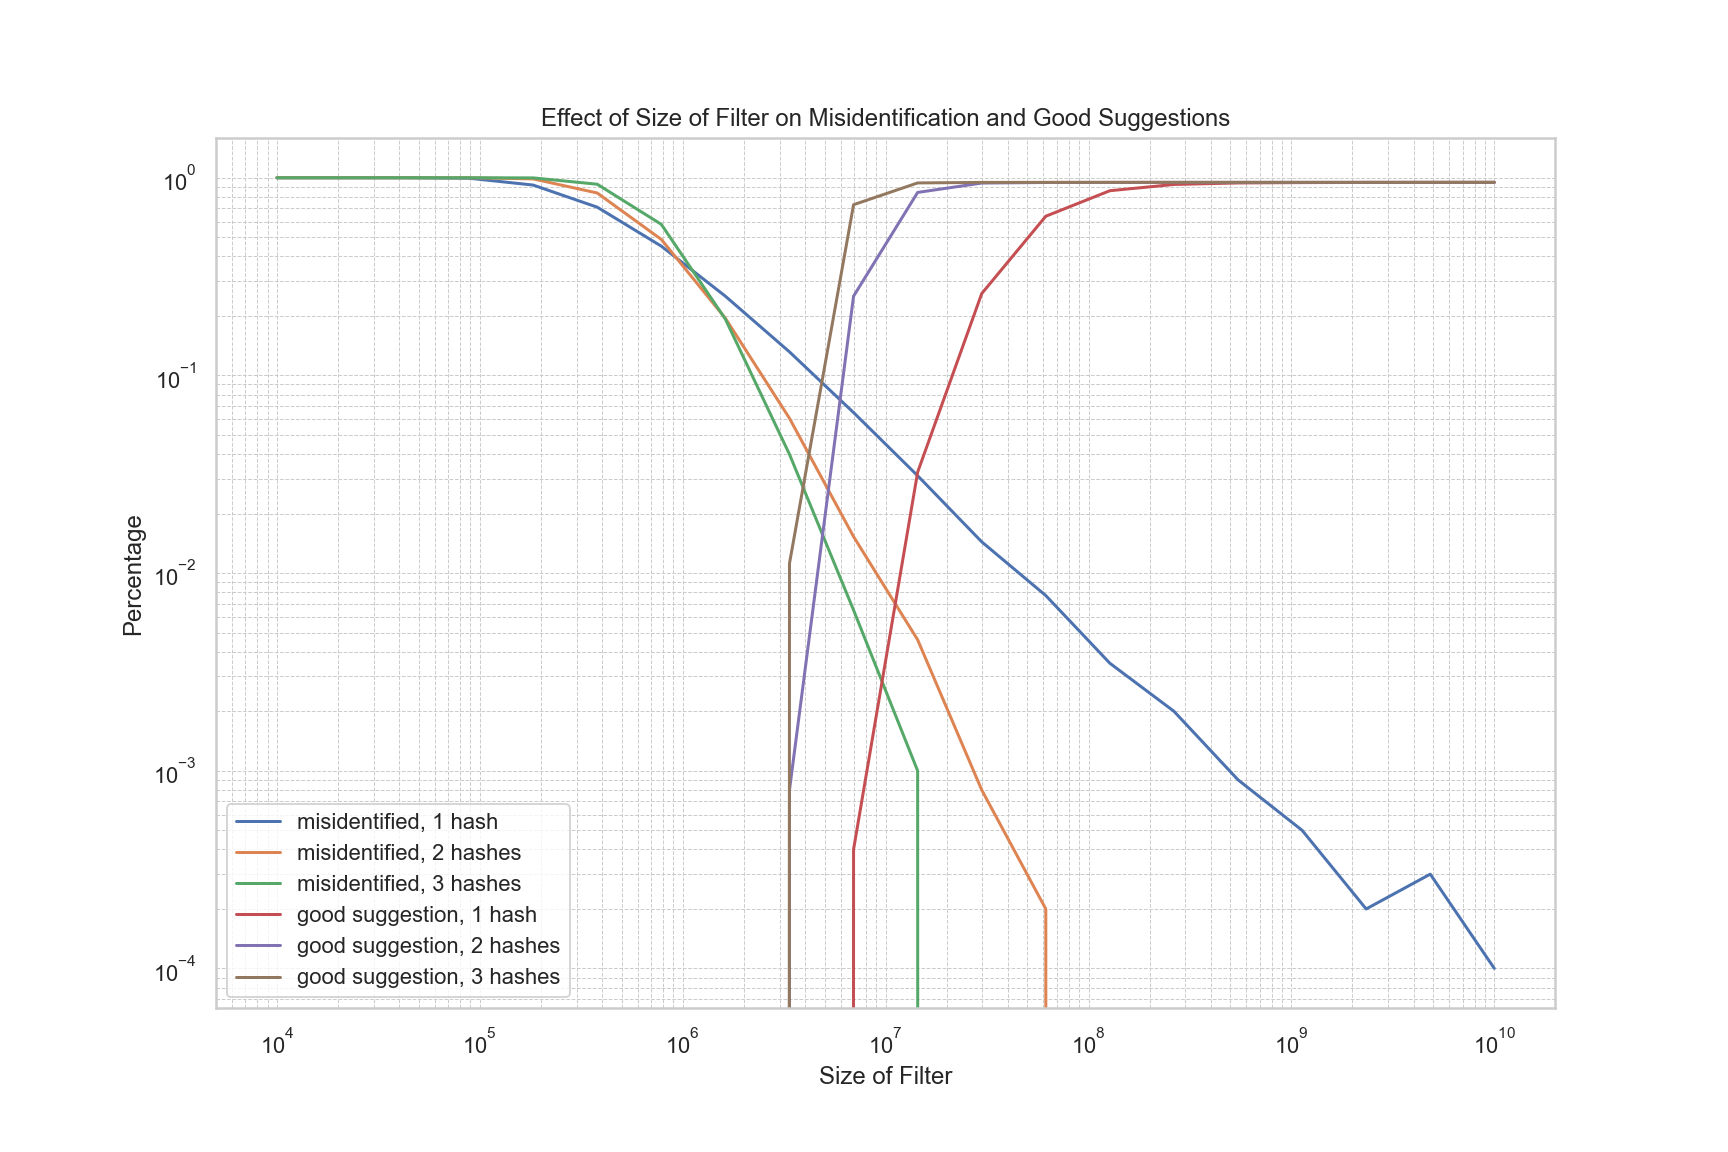

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert percentages back to numerical format
plot_data["percentages"] = plot_data["percentages"].str.rstrip('%').astype('float') / 100.0

plt.figure(figsize=(12, 8))

# Loop through the categories and plot the data for each
for category in categories:
    subset = plot_data[plot_data['Good suggestions or misclassified'] == category]
    plt.plot(subset["size"], subset["percentages"], label=category)

plt.xlabel("Size of Filter")
plt.ylabel("Percentage")
plt.title("Effect of Size of Filter on Misidentification and Good Suggestions")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.yscale("log")
plt.xscale("log")
plt.show()
